<a href="https://colab.research.google.com/github/ritam-sarkar/ml-practice/blob/main/Autoencoder__gray_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist


In [81]:
# 1️⃣ Load MNIST + filter 2 and 5
(x_train, y_train), _ = mnist.load_data()
mask = (y_train == 2) | (y_train == 5)
x_train = x_train[mask]
y_train = y_train[mask]

# 2️⃣ Normalize + reshape to (28,28,1)
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

In [82]:
print(x_train.shape)
print(x_test.shape)

(11379, 28, 28, 1)
(1924, 784)


In [83]:
# 3️⃣ Encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)  # Output shape: (7,7,16)

# 4️⃣ Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# 5️⃣ Models
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

# 6️⃣ Compile + Train
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=30, batch_size=128, verbose=1)


Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - loss: 0.5085
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 238ms/step - loss: 0.1312
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 39s 216ms/step - loss: 0.1037
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 210ms/step - loss: 0.0954
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 207ms/step - loss: 0.0917
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - loss: 0.0887
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - loss: 0.0869
Epoch 8/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 39s 207ms/step - loss: 0.0857
Epoch 9/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - loss: 0.0845
Epoch 10/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - loss: 0.0833
Epoch 11/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 222ms/step - loss: 0.0827
Epoch 12/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - loss: 0.0820
Epoch 13/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - loss: 0.0815
Epoch 14/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - loss: 0.0811
Epoch 15/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 

356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


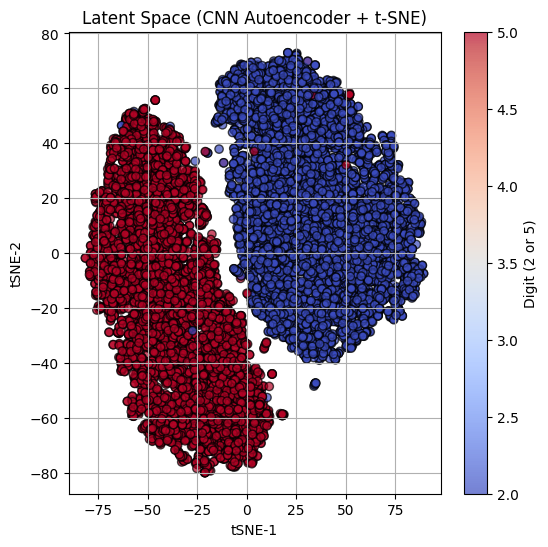

In [84]:
# 7️⃣ Get latent features
latent_vectors = encoder.predict(x_train)

# 8️⃣ Flatten latent vectors for t-SNE
latent_vectors_flat = latent_vectors.reshape(latent_vectors.shape[0], -1)

# 9️⃣ Visualize latent space with t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
latent_2d = tsne.fit_transform(latent_vectors_flat)

plt.figure(figsize=(6,6))
plt.scatter(latent_2d[:,0], latent_2d[:,1], c=y_train, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title("Latent Space (CNN Autoencoder + t-SNE)")
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")
plt.colorbar(label='Digit (2 or 5)')
plt.grid(True)
plt.show()



In [87]:
latent_vectors.shape

(11379, 7, 7, 16)

## Sample code for re construction

In [68]:
input_img = Input(shape=(28*28,))

# Encoder
encoded = Dense(2, activation='relu')(input_img)  # latent space (64-dim)

# Decoder
decoded = Dense(28*28, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mse')

In [69]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# 5️⃣ Encode & Decode some test images
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# Decoder model to reconstruct from latent space
encoded_input = Input(shape=(2,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2220 - val_loss: 0.1583
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1326 - val_loss: 0.0841
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0812 - val_loss: 0.0750
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0750 - val_loss: 0.0731
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0733 - val_loss: 0.0722
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0724 - val_loss: 0.0716
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0719 - val_loss: 0.0710
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0712 - val_loss: 0.0700
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0702 - val_loss: 0.0683
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0685 - val_loss: 0.0661
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [70]:
print(x_train.shape)
print(encoded_imgs.shape)
print(decoded_imgs.shape)

print(y_test.shape)


(11379, 784)
(1924, 2)
(1924, 784)
(1924,)


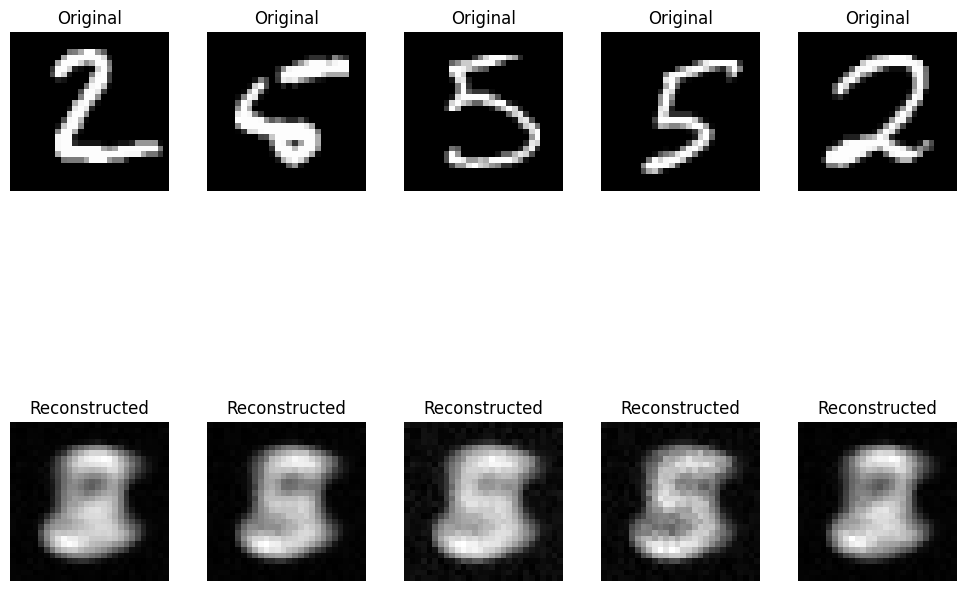

In [71]:
n = 5
plt.figure(figsize=(10,6))
for i in range(n):
    # 1️⃣ Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')


    # 3️⃣ Reconstructed
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Here we plot the 2 dimenstional latent space , we can notice the numbers are clustered , I create 2 dimensional space , then numbers would have cluster properly

In [72]:
unique, counts = np.unique(y_test, return_counts=True)

for label, count in zip(unique, counts):
    print(f"Label {label}: {count} samples")

Label 2: 1032 samples
Label 5: 892 samples


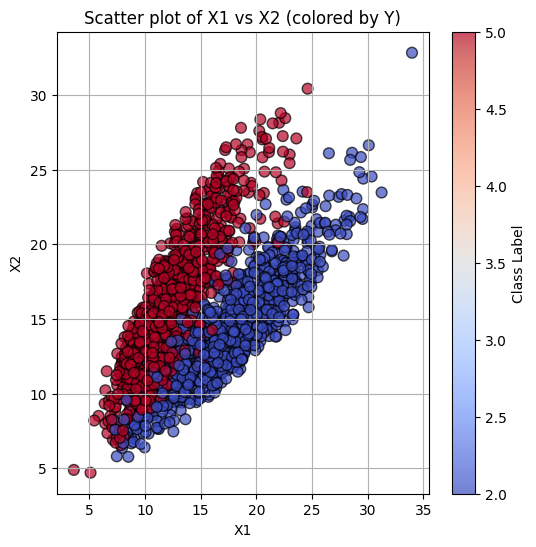

In [73]:
plt.figure(figsize=(6,6))
plt.scatter(encoded_imgs[:,0], encoded_imgs[:,1], c=y_test, cmap='coolwarm', s=60, edgecolors='k', alpha=0.7)

plt.title("Scatter plot of X1 vs X2 (colored by Y)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.colorbar(label='Class Label')
plt.show()